## Employee attrition analysis

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [263]:
employees = pd.read_csv('GBIS_Case_Study_2_Data_All.csv')

This dataset has records of employees who are working and who left  

In [138]:
employees.head()

,Emp ID,Total Years of Experience,No. of companies worked for previously,Work life balance Score,Satisfaction level,Last Evaluation,No. of projects,Average montly hours,Tenure of association,Work accident,Promotion in last 5 years,Department,Salary,Who_left
0,2001,13.0,0.0,4.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low,0
1,2002,8.0,2.0,3.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low,0
2,2003,6.0,0.0,2.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low,0
3,2004,12.0,2.0,3.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low,0
4,2005,20.0,1.0,1.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low,0


# Exploratory Data Analysis


## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

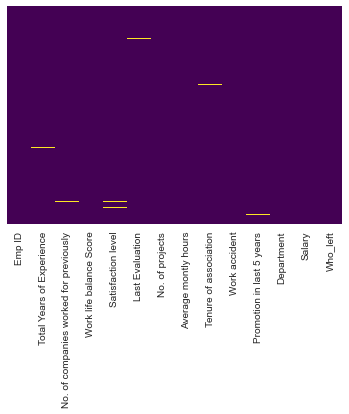

In [180]:
sns.heatmap(employees.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [181]:
len(employees)

15006

# Let's check which department has highest attrition rate

<AxesSubplot:xlabel='Who_left', ylabel='count'>

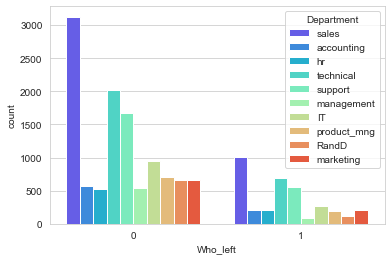

In [182]:
sns.set_style('whitegrid')
sns.countplot(x='Who_left',hue='Department',data=employees,palette='rainbow')

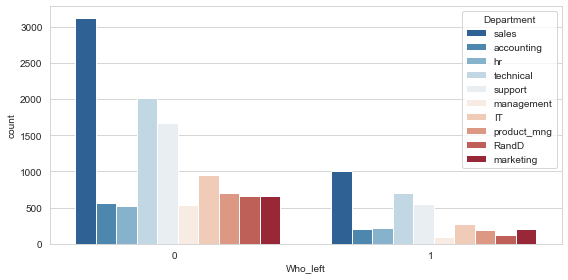

In [264]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Who_left',hue='Department',data=employees,palette='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()


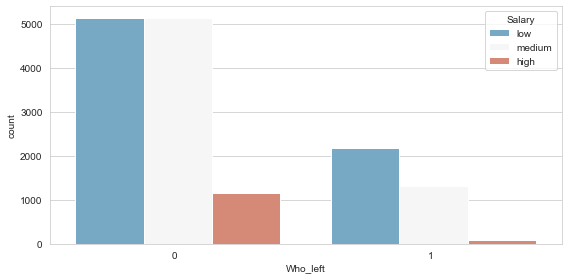

In [265]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Who_left',hue='Salary',data=employees,palette='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.tight_layout()
plt.show()


C:\Users\vinay\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure of association'>

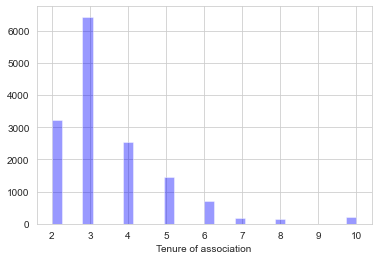

In [266]:
sns.distplot(employees['Tenure of association'].dropna(),kde=False,color='blue',bins=30)

In [186]:
employees.groupby('Department').mean()

,Emp ID,Total Years of Experience,No. of companies worked for previously,Work life balance Score,Satisfaction level,Last Evaluation,No. of projects,Average montly hours,Tenure of association,Work accident,Promotion in last 5 years,Who_left
Department,,,,,,,,,,,,
IT,7653.790375,14.553191,1.115102,2.995912,0.618754,0.717142,3.815661,202.263502,3.466122,0.133279,0.002447,0.221860
RandD,6762.392857,14.067775,1.070332,3.031888,0.620282,0.711959,3.858238,201.103581,3.368622,0.170918,0.034439,0.151786
accounting,7266.085938,15.146023,1.096480,3.013038,0.580889,0.717490,3.822917,201.178851,3.522816,0.125000,0.018349,0.265625
hr,7047.617568,14.867209,1.154263,2.981055,0.598444,0.708959,3.659459,198.934694,3.359079,0.120433,0.020298,0.290541
management,9439.363492,14.304625,1.085714,2.953968,0.621099,0.724000,3.860095,201.138315,4.302067,0.163492,0.109524,0.144444
marketing,7758.968568,14.878077,1.121354,2.933644,0.618926,0.716316,3.688009,199.423392,3.568102,0.160652,0.051222,0.237485
product_mng,8091.549390,14.327009,1.058824,2.991121,0.619877,0.715050,3.811321,200.144928,3.478309,0.145880,0.000000,0.218646
sales,7675.607393,14.621208,1.125878,2.989354,0.614460,0.709483,3.775841,200.856622,3.534625,0.141890,0.024455,0.244745
support,7206.666816,14.883836,1.090705,3.031011,0.618466,0.722806,3.801798,200.746853,3.393243,0.154917,0.008997,0.247867


In [187]:
employees.groupby('Salary').mean()

,Emp ID,Total Years of Experience,No. of companies worked for previously,Work life balance Score,Satisfaction level,Last Evaluation,No. of projects,Average montly hours,Tenure of association,Work accident,Promotion in last 5 years,Who_left
Salary,,,,,,,,,,,,
high,8622.897332,13.322267,1.016990,2.962005,0.637569,0.704529,3.767179,199.867421,3.692805,0.155340,0.058205,0.066289
low,7329.131255,15.083127,1.141371,2.994936,0.601196,0.716882,3.798905,200.939577,3.438683,0.141919,0.009164,0.296965
medium,7483.181579,14.556005,1.092532,2.985872,0.621489,0.717166,3.813373,201.365956,3.528261,0.145296,0.028296,0.204373


In [188]:
employees.groupby('Who_left').mean()

,Emp ID,Total Years of Experience,No. of companies worked for previously,Work life balance Score,Satisfaction level,Last Evaluation,No. of projects,Average montly hours,Tenure of association,Work accident,Promotion in last 5 years
Who_left,,,,,,,,,,,
0,7814.222203,12.683495,0.997636,2.996936,0.666681,0.715455,3.786377,199.087635,3.380652,0.174967,0.026267
1,6508.845874,21.255794,1.469302,2.958812,0.439726,0.717904,3.855263,207.377859,3.875316,0.046831,0.005891


## Few observations:

#### ->The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
#### ->The average monthly work hours of employees who left the company is more than that of the employees who stayed.
#### ->The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
#### ->The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

In [189]:
employees.groupby('Salary').mean()

,Emp ID,Total Years of Experience,No. of companies worked for previously,Work life balance Score,Satisfaction level,Last Evaluation,No. of projects,Average montly hours,Tenure of association,Work accident,Promotion in last 5 years,Who_left
Salary,,,,,,,,,,,,
high,8622.897332,13.322267,1.016990,2.962005,0.637569,0.704529,3.767179,199.867421,3.692805,0.155340,0.058205,0.066289
low,7329.131255,15.083127,1.141371,2.994936,0.601196,0.716882,3.798905,200.939577,3.438683,0.141919,0.009164,0.296965
medium,7483.181579,14.556005,1.092532,2.985872,0.621489,0.717166,3.813373,201.365956,3.528261,0.145296,0.028296,0.204373


Text(0, 0.5, 'Frequency of Turnover')

<Figure size 576x288 with 0 Axes>

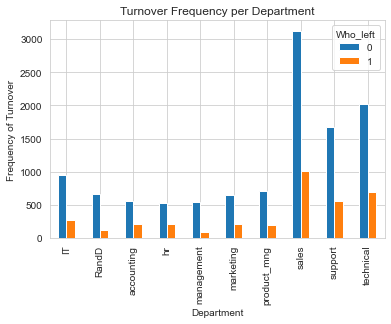

In [268]:
plt.figure(figsize=(8,4))
pd.crosstab(employees.Department,employees.Who_left).plot(kind='bar')
plt.title('Turnover Frequency per Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')

Text(0, 0.5, 'Proportion of Employees')

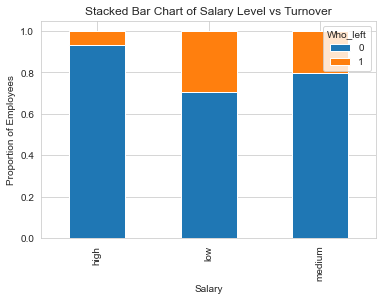

In [191]:
table=pd.crosstab(employees.Salary, employees.Who_left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary')
plt.ylabel('Proportion of Employees')

In [192]:
pd.crosstab(employees.Department, employees.Who_left)

Who_left,0,1
Department,,
IT,954,272
RandD,665,119
accounting,564,204
hr,525,215
management,539,91
marketing,655,204
product_mng,704,197
sales,3126,1013
support,1675,552


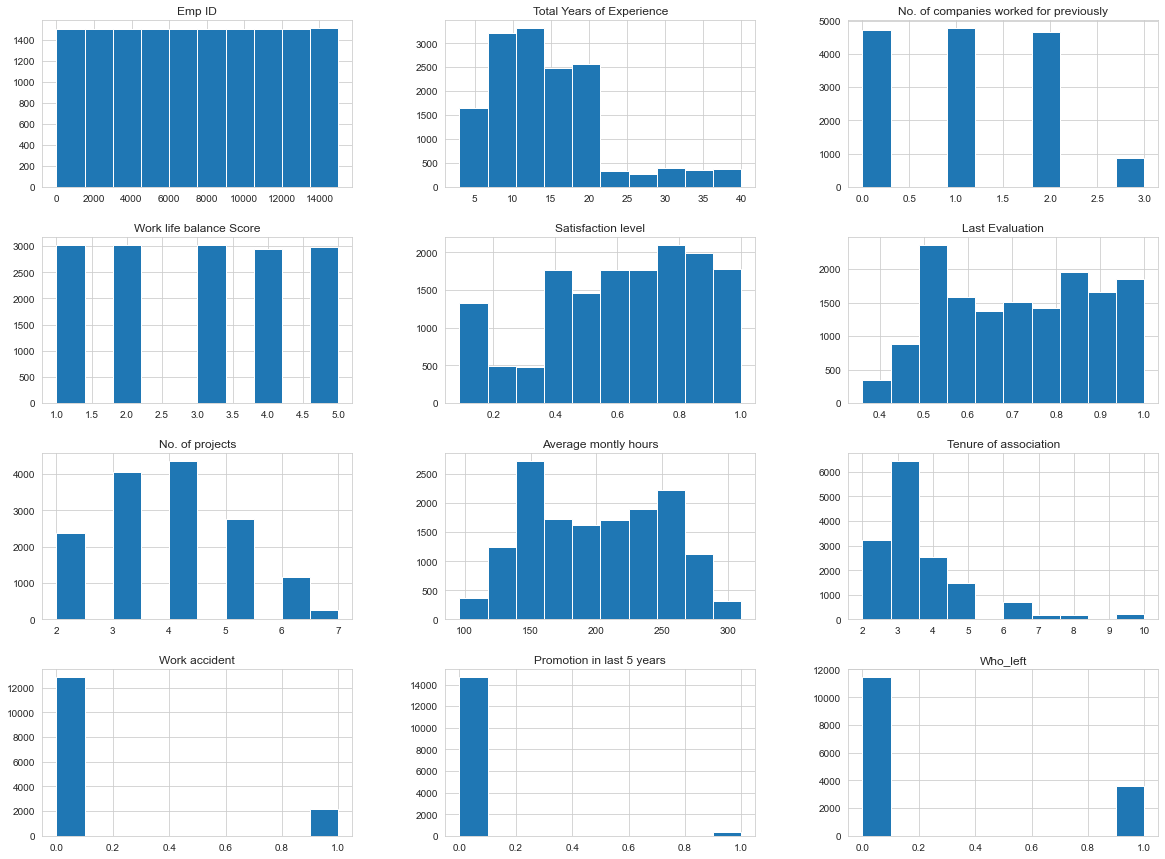

In [193]:
num_bins = 10

employees.hist(bins=num_bins, figsize=(20,15))
plt.show()

In [194]:
cat_vars=['Department','Salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(employees[var], prefix=var)
    employees1=employees.join(cat_list, how='left', lsuffix='_left', rsuffix='_right')
    employees=employees1

In [195]:
employees.head()

,Emp ID,Total Years of Experience,No. of companies worked for previously,Work life balance Score,Satisfaction level,Last Evaluation,No. of projects,Average montly hours,Tenure of association,Work accident,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium
0,2001,13.0,0.0,4.0,0.58,0.74,4.0,215.0,3.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2002,8.0,2.0,3.0,0.82,0.67,2.0,202.0,3.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,2003,6.0,0.0,2.0,0.45,0.69,5.0,193.0,3.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,2004,12.0,2.0,3.0,0.78,0.82,5.0,247.0,3.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,2005,20.0,1.0,1.0,0.49,0.60,3.0,214.0,2.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [196]:
employees1.drop(['Department','Salary','Emp ID' ],  axis='columns', inplace=True)

In [206]:
employees2 = employees

In [207]:
employees2.dropna(inplace=True)

In [208]:

employees2.columns.values

array(['Total Years of Experience',
       'No. of companies worked for previously',
       'Work life balance Score', 'Satisfaction level', 'Last Evaluation',
       'No. of projects', 'Average montly hours', 'Tenure of association',
       'Work accident', 'Promotion in last 5 years', 'Who_left',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low',
       'Salary_medium'], dtype=object)

In [169]:
from sklearn.model_selection import train_test_split

In [209]:
X = employees2[['Total Years of Experience',
       'No. of companies worked for previously',
       'Work life balance Score', 'Satisfaction level', 'Last Evaluation',
       'No. of projects', 'Average montly hours', 'Tenure of association',
       'Work accident', 'Promotion in last 5 years',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low',
       'Salary_medium']]
y = employees2['Who_left']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## predicting using Logistic Regression Model

In [204]:
from sklearn.linear_model import LogisticRegression

In [213]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [214]:
predictions = logmodel.predict(X_test)

In [215]:
from sklearn.metrics import classification_report

In [216]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3728
           1       0.80      0.58      0.67      1123

    accuracy                           0.87      4851
   macro avg       0.84      0.77      0.79      4851
weighted avg       0.86      0.87      0.86      4851



In [218]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logmodel.predict(X_test))))

Logistic regression accuracy: 0.869


## Logistic regression accuracy is : 86.9%

## predicting using Random Forest Model

In [222]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [224]:
pred_rand = rf.predict(X_test)

In [238]:
print(classification_report(y_test,pred_rand))
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3728
           1       0.99      0.96      0.97      1123

    accuracy                           0.99      4851
   macro avg       0.99      0.98      0.98      4851
weighted avg       0.99      0.99      0.99      4851

Random Forest accuracy: 0.988


## Random Forest accuracy is : 98.8%

In [227]:
from sklearn.metrics import confusion_matrix

In [228]:
print(confusion_matrix(y_test,pred_rand))

[[3717   11]
 [  45 1078]]


### The random Forest model is predicting quite good numbers when we check the confusion matrix

#### Let's see what all variables are contrubuting to the employee attrition

In [259]:

feature_labels = np.array(['Total Years of Experience',
       'No. of companies worked for previously',
       'Work life balance Score', 'Satisfaction level', 'Last Evaluation',
       'No. of projects', 'Average montly hours', 'Tenure of association',
       'Work accident', 'Promotion in last 5 years',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'Salary_high', 'Salary_low',
       'Salary_medium'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
 #   analysis_result += ('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Department_marketing-0.08%
Department_IT-0.09%
Department_management-0.10%
Promotion in last 5 years-0.10%
Department_product_mng-0.10%
Department_RandD-0.11%
Department_accounting-0.11%
Department_hr-0.13%
Department_support-0.19%
Department_sales-0.21%
Salary_medium-0.24%
Department_technical-0.25%
Salary_high-0.32%
Salary_low-0.50%
Work accident-0.65%
Work life balance Score-0.65%
Last Evaluation-7.80%
No. of companies worked for previously-8.15%
Average montly hours-9.61%
Tenure of association-10.60%
No. of projects-12.68%
Satisfaction level-23.24%
Total Years of Experience-24.09%


## Conclusion
#### people are quitting the company mainly because...
They are not getting promoted.

Because of low work satisfaction.

Those who have completed 3 years tenure with the company

Employees having low salary

Those who are having low work life balance. 

Workload and number of working hours might also affect.